In [ ]:
from IPython.display import display,Math,Latex  #for proper rendering of latex in colab
import numpy as np

# for generating plots
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Quick Recap:**


1.   Training data conatains features and labels that id real numbers
2.   Model or inference **y=Xw**



**C1:Creating Training data**

In [ ]:
w1=3
w0=4
n=100

X=10*np.random.rand(n,)  #rand: will generate data of size n from uniform distribution (0,1] 

#Getting y=4 + 3*x + noise .whereas noise is generated randomly
y=w0+w1*X+np.random.randn(n,)  #randn: will generate data of size n from normal distribution (-1,1)

In [ ]:
print("Shape of the training data feature matrix", X.shape)
print("Shape of the label vector", y.shape)

Shape of the training data feature matrix (100,)
Shape of the label vector (100,)


Let's divide data into test train sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
print("Shape of training feature matrix:",X_train.shape)
print("Shape of training label vector:",y_train.shape)

print("Shape of test feature matrix:",X_test.shape)
print("Shape of test label vector:",y_test.shape)

Shape of training feature matrix: (80,)
Shape of training label vector: (80,)
Shape of test feature matrix: (20,)
Shape of test label vector: (20,)


In [ ]:
X_train[:5]

array([9.891412  , 1.67242768, 4.26493678, 7.16493278, 7.17989244])

In [ ]:
y_train[:5]

array([35.50978858,  9.10309005, 17.15708349, 27.24776237, 26.8880575 ])

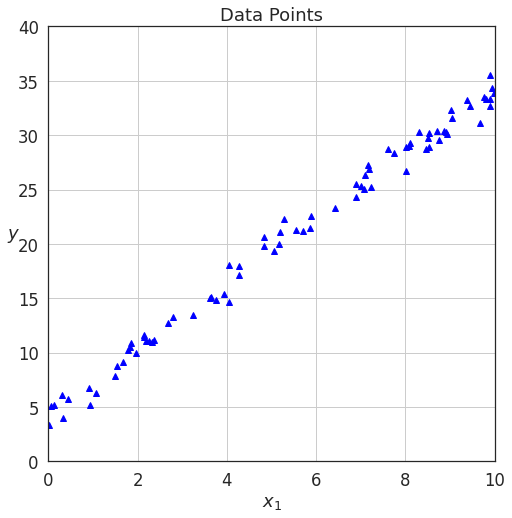

In [ ]:
sns.set_style("white")
f=plt.figure(figsize=(8,8))
sns.set_context("notebook",font_scale=1.5,rc={"lines.linewidth":2.5})

plt.plot(X_train,y_train,"b^")
plt.title("Data Points")
plt.grid(True)
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,10,0,40])
plt.show()

**y=w0 + w1x1 ** <br>
We add a special dummy feature x0 and set it to 1.We create a helper for that

In [ ]:
def add_dummy_feature(x):
  ''' Adds a dummy to the dataset
  Args:
    x:Training dataset
  Returns:
    Training dataset with an addition of dummy feature.
  '''
  return np.column_stack((np.ones(x.shape[0]),x))

In [ ]:
import unittest

class TestAddDummyFeature(unittest.TestCase):

  def test_add_dummy_feature(self):

    '''Testcase function for add_dummy_feature'''
    train_matrix=np.array([[3,2,5],[9,4,7]])
    train_matrix_with_dummy_feature=add_dummy_feature(train_matrix)

    #test the shape either stops
    self.assertEqual(train_matrix_with_dummy_feature.shape,(2,4))

    np.testing.assert_array_equal(
        train_matrix_with_dummy_feature,np.array([[1,3,2,5],[1,9,4,7]])
    )

unittest.main(argv=[''],defaultTest='TestAddDummyFeature',verbosity=2,exit=False)


test_add_dummy_feature (__main__.TestAddDummyFeature)
Testcase function for add_dummy_feature ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [ ]:
add_dummy_feature(np.array([[3,2],[5,4]]))

array([[1., 3., 2.],
       [1., 5., 4.]])

In [ ]:
print("Before adding the dummy feature:\n",X_train[:5])
print('\n')
X_train_with_dummy=add_dummy_feature(X_train)
print("After adding the dummy feature:\n",X_train_with_dummy[:5])

Before adding the dummy feature:
 [9.891412   1.67242768 4.26493678 7.16493278 7.17989244]


After adding the dummy feature:
 [[1.         9.891412  ]
 [1.         1.67242768]
 [1.         4.26493678]
 [1.         7.16493278]
 [1.         7.17989244]]


**Model** <br>

The general vectorized form is as follows: <br>
**y**(nx1)=**X**(nx(m+1))**w**((m+1)x1)

where <br>


*   **n** is number of examples in dataset(train/test/validation)
*   **m** is the number of features

*   **X** is a feature matrix contain (m+1) features for n examples along rows
*   **w** is a weight vector conatining (m+1) weights one for each feature

*   **y** is a label vector containing labels for n examples with shape(n,)











In [ ]:
def predict(X,w):
  ''' Prediction of output for a given input

      Args:
        X: Features matrix of shape(n,m+1)
        w: weight vector of shape(m+1,n)
      Returns:
        y: Predicted label vector of shape(n,)  
  '''

  assert X.shape[-1]==w.shape[0],"X and w don't have compatible dimensions"
  return X@w

In [ ]:
import unittest

class TestPredict(unittest.TestCase):

  def test_predict(self):

    #setup
    train_matrix=np.array([[1,3,2,5],[1,9,4,7]])
    weight_vector=np.array([1,1,1,1])
    expected_label_vector=np.array([11,21])

    #call
    predicted_label_vector=predict(train_matrix,weight_vector)

    #asserts
    self.assertEqual(predicted_label_vector.shape,(2,))

    np.testing.assert_array_equal(expected_label_vector,predicted_label_vector)
unittest.main(argv=[''],defaultTest='TestPredict',verbosity=2,exit=False)    

test_predict (__main__.TestPredict) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


Dataset:n=100, m=1, [w0,w1]=[4,3]


In [ ]:
def generate(n):
  w1=3
  w0=4
  X=10*np.random.rand(n,)
  y=w0+w1*X+np.random.rand(n,)
  return(X,y)

In [ ]:
def preprocess(X,y):
  from sklearn.model_selection import train_test_split
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
  X_train=add_dummy_feature(X_train)
  X_test=add_dummy_feature(X_test)
  return(X_train,X_test,y_train,y_test)

In [ ]:
X,y=generate(100)
X_train,X_test,y_train,y_test=preprocess(X,y)

In [ ]:
w=np.random.rand(2,)

In [ ]:
y_hat=predict(X_train,w)

In [ ]:
y_hat[:10]

array([1.57946365, 3.73887567, 1.81486357, 3.02585987, 5.17995337,
       4.33769613, 1.17234153, 4.81585052, 3.62374906, 1.05326779])

In [ ]:
y_train[:10]

array([ 8.57670455, 21.84228983, 10.16790269, 17.9036616 , 30.76784502,
       25.47363592,  5.78648263, 29.23582094, 21.66292755,  5.36725134])

In [ ]:
'''similar as predic but we doing it by non-vectorized wayS'''
def non_vectorized_predict(X,w):
  y=[]
  for i in range(0,X.shape[0]):
    y_hat_i=0
    for j in range(0,X.shape[1]):
      y_hat_i+=X[i][j]*w[j]
    y.append(y_hat_i)
  return np.array(y)

In [ ]:
import time
X,y=generate(1000000)
X_train,X_test,y_train,y_test=preprocess(X,y)

start_time=time.time()
y_hat_vectorized=predict(X_train,w)
end_time=time.time()

print("Total time incurred in vectorized inference is: %0.6f s"%(end_time-start_time))

start_time=time.time()
y_hat_non_vectorized=non_vectorized_predict(X_train,w)
end_time=time.time()

print("Total time incurred in non vectorized inference is: %0.6f s"%(end_time-start_time))


Total time incurred in vectorized inference is: 0.002647 s
Total time incurred in non vectorized inference is: 1.412890 s


**Loss component** <br>

Loss function: J(w)=1/2(Xw-y)'(Xw-y)

In [ ]:
def loss(X,y,w):
  '''
   calculates the loss for a model based on known labels

   Args:
    X:Feature matrix for given inputs
    y: Output label as predicted by the given model
    w: weight vector

  Returns:
    Loss  
  '''
  e=predict(X,w)-y
  return (1/2)*(np.transpose(e)@e)

In [ ]:
import unittest
class TestLossFunction(unittest.TestCase):
  def test_loss_function(self):

    feature_matrix=np.array([[1,3,2,5],[1,9,4,7]])
    weight_vector=np.array([1,1,1,1])
    label_vector=np.array([6,11])
    expected_loss=np.array([62.5])

    #call
    loss_value=loss(feature_matrix,label_vector,weight_vector)

    self.assertEqual(loss_value.shape, ())

    np.testing.assert_array_equal(expected_loss,loss_value)
unittest.main(argv=[''],defaultTest='TestLossFunction',verbosity=2,exit=False)    


test_loss_function (__main__.TestLossFunction) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


Since we haven't trained our model,let's use a random weight vector to calculate loss for linear regression model with single feature on synthetic dataset

In [ ]:
w=np.random.rand(2,)
w

array([0.31218956, 0.30374157])

In [ ]:
def generate(n):
  w1=3
  w0=4
  X=10*np.random.rand(n,)
  y=w0+w1*X+np.random.rand(n,)
  return(X,y)

In [ ]:
def preprocess(X,y):
  from sklearn.model_selection import train_test_split
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
  # X_train=add_dummy_feature(X_train)
  # X_test=add_dummy_feature(X_test)
  return(X_train,X_test,y_train,y_test)

In [ ]:
X,y=generate(100)
X_train,X_test,y_train,y_test=preprocess(X,y)
print(X_train.shape," ",y_train.shape)

(80,)   (80,)


In [ ]:
def visualize_loss_for_single_feature_model(X,y,w):
  sns.set_style('white')
  f=plt.figure(figsize=(8,8))
  sns.set_context("notebook",font_scale=1.5, rc={"lines.linewidth": 2.5})
  plt.scatter(X, y, color="g")
  y_pred = w[0] + w[1]*X
  plt.plot(X,y_pred,color="b")
  plt.vlines(X, y_pred, y, color='r')
  plt.title("Data Points")
  plt.grid(True)
  plt.xlabel("$x_1$", fontsize=18)
  plt.ylabel("$y$", rotation=0, fontsize=18)
  plt.axis([0,10,0,40])
  plt.show()



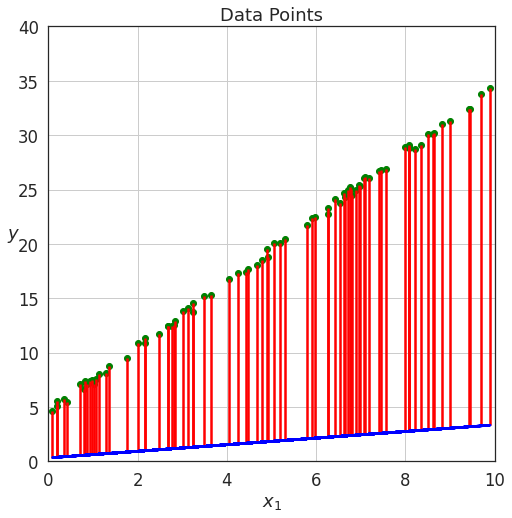

In [ ]:
visualize_loss_for_single_feature_model(X_train,y_train,w)

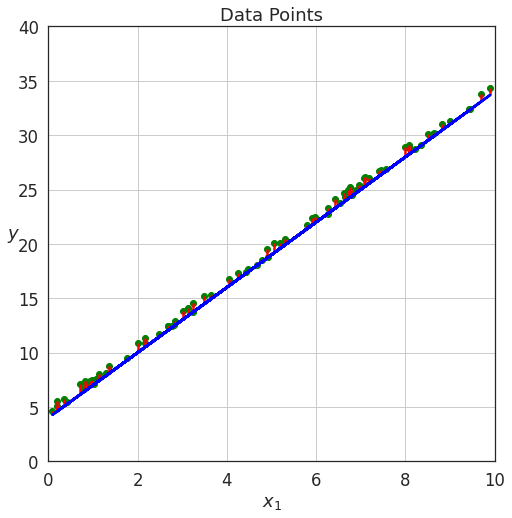

In [ ]:
visualize_loss_for_single_feature_model(X_train,y_train,np.array([4,3]))

In [ ]:
def preprocess(X,y):
  from sklearn.model_selection import train_test_split
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
  X_train=add_dummy_feature(X_train)
  X_test=add_dummy_feature(X_test)
  return(X_train,X_test,y_train,y_test)

**Optimization**


In [ ]:
X,y=generate(100)
X_train,X_test,y_train,y_test=preprocess(X,y)

There are two types of optimization techniques: <br> 

1. Normal equation (w=(X'X)^**(-1)**X') psudoinverse of feature matrix
2. Gradient Descent

In [ ]:
def normal_equation(X,y):
  return np.linalg.pinv(X) @ y

In [ ]:
import unittest
class TestNormalEquation(unittest.TestCase):

  def test_normal_equation(self):

    feature_matrix=X_train
    label_vector=y_train
    expected_weight_vector=np.array([4.,3.])

    estimated_weight_vector=normal_equation(feature_matrix,label_vector)
    self.assertEqual(estimated_weight_vector.shape,(2,))

    np.testing.assert_array_almost_equal(
    estimated_weight_vector,expected_weight_vector,decimal=0
    )

unittest.main(argv=[''],defaultTest='TestNormalEquation',verbosity=2,exit=False)


test_normal_equation (__main__.TestNormalEquation) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


**Gradient Descent**
Iterate untill conveergence:
  

1.   Calculate partial derivative of loss w.r.t weight vector
2.   Calculate new values of weights
3.   Update weights to new values simultaneously

**Partial derivative of loss funtion**

d/dw(J(w))=X'(Xw-y)





In [ ]:
def calculate_gradient(X,y,w):
  '''
  Args:
    X:Features matrix for training data
    y:Label vector for training data
    w:Weight vector
  '''
  return np.transpose(X)@(predict(X,w)-y)

In [ ]:
class TestCalculateGradient(unittest.TestCase):
      def test_calculate_gradient(self):
        feature_matrix=np.array([[1,3,2,5],[1,9,4,7]])
        weight_vector=np.array([1,1,1,1])
        label_vector=np.array([6,11])
        expected_grad=np.array([15,105,50,95])

        grad=calculate_gradient(feature_matrix,label_vector,weight_vector)

        self.assertEqual(grad.shape,(4,))

        np.testing.assert_array_almost_equal(expected_grad,grad,decimal=0)
unittest.main(argv=[''],defaultTest="TestCalculateGradient",verbosity=2,exit=False)        

test_calculate_gradient (__main__.TestCalculateGradient) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


**Weight updates**

In [ ]:
def update_weights(w,grad,lr):

  '''
    Args:
      w: weight vector
      grad: gradient of loss w.r.t w
      lr: learning rate
    Return: updated weight


  '''
  return (w-lr*grad)

In [ ]:
class TestUpdateWeights(unittest.TestCase):

  def test_update_weights(self):

    weight_vector=np.array([1,1,1,1])
    grad_vector=np.array([15,105,50,95])
    lr=0.001
    expected_w_new=np.array([0.985,0.895,0.95,0.905])

    w_new=update_weights(weight_vector,grad_vector,lr)

    self.assertEqual(expected_w_new.shape,(4,))

    np.testing.assert_array_almost_equal(expected_w_new,w_new,decimal=1)
unittest.main(argv=[''],defaultTest="TestUpdateWeights",verbosity=2,exit=False)    

test_update_weights (__main__.TestUpdateWeights) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


In [ ]:
def gradient_descent(X:np.ndarray,y:np.ndarray,lr:float,num_epochs:int):

  '''
    Args:
      X:feature matrix
      y:label
      lr:learning rate
      num_epochs:Number of training steps

    Return:
      Weight vector:Final weight vector
      Error vector accross different iterations
      Weight vectors across diifferent iterations  
  '''

  w_all=[]  #all parameters across iterations
  err_all=[] #all errors across iterations

  w=np.zeros((X.shape[1]))

  print()

  for i in np.arange(0,num_epochs):
    w_all.append(w)

    err_all.append(loss(X,y,w))

    dJdW=calculate_gradient(X,y,w)

    if(i%100)==0:
      print('Iteration #:%d,loss:%4.2f'%(i,err_all[-1]))

    w=update_weights(w,dJdW,lr)
  return w,err_all,w_all  #err_all used for plotting learning curves where as w_all for plotting trajectory of gradient descent



In [ ]:
class TestGradientDescent(unittest.TestCase):

  def test_gradient_descent(self):

    feature_matrix=X_train
    label_vector=y_train
    expected_weights=np.array([4.,3.])

    w,err_all,w_all=gradient_descent(feature_matrix,label_vector,lr=0.0001,num_epochs=2000)

    self.assertEqual(w.shape,(2,))

    np.testing.assert_array_almost_equal(expected_weights,w,decimal=0)
unittest.main(argv=[''],defaultTest='TestGradientDescent',verbosity=2,exit=False)    
                                     


test_gradient_descent (__main__.TestGradientDescent) ... 


Iteration #:0,loss:16145.08
Iteration #:100,loss:109.84
Iteration #:200,loss:74.35
Iteration #:300,loss:50.66
Iteration #:400,loss:34.86
Iteration #:500,loss:24.32
Iteration #:600,loss:17.28
Iteration #:700,loss:12.58
Iteration #:800,loss:9.45
Iteration #:900,loss:7.36
Iteration #:1000,loss:5.96
Iteration #:1100,loss:5.03
Iteration #:1200,loss:4.41
Iteration #:1300,loss:4.00
Iteration #:1400,loss:3.72
Iteration #:1500,loss:3.54
Iteration #:1600,loss:3.41
Iteration #:1700,loss:3.33
Iteration #:1800,loss:3.28
Iteration #:1900,loss:3.24


ok

----------------------------------------------------------------------
Ran 1 test in 0.045s

OK


In [ ]:
def predict(X,w):
  ''' Prediction of output for a given input

      Args:
        X: Features matrix of shape(n,m+1)
        w: weight vector of shape(m+1,n)
      Returns:
        y: Predicted label vector of shape(n,)  
  '''

  assert X.shape[-1]==w.shape[0],"X and w don't have compatible dimensions"
  return X@w

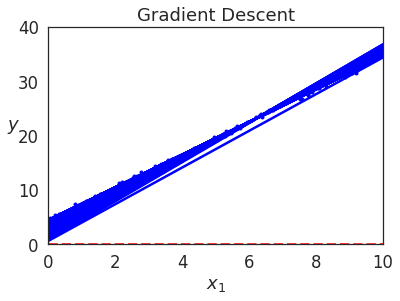

In [ ]:
# w,err_all,w_all=gradient_descent(X_train,y_train,lr=0.0001,num_epochs=2000)
X_b=np.c_[np.ones((X.shape[0],1)),X]
X_new=np.array([[0],[10]])
X_new_b=np.c_[np.ones((2,1)),X_new]

for j in range(0,len(w_all)):
  if j%10!=0: continue
  y_hat=predict(X_new_b,w_all[j])
  style="b-" if j>0 else "r--"
  plt.plot(X_new_b[:,1],y_hat,style)

plt.plot(X_train[:,1],y_train,"b.")
plt.xlabel("$x_1$",fontsize=18)  
plt.ylabel("$y$",rotation=0,fontsize=18)  
plt.title('Gradient Descent',fontsize=18)
plt.axis([0,10,0,40])
plt.show()  

In [ ]:
def plot_learning_curves(err_all):
  plt.plot(err_all)
  plt.xlabel('iteration #')
  plt.ylabel('Loss:$J(\mathbf{w})$')


Iteration #:0,loss:16145.08
Iteration #:100,loss:109.84
Iteration #:200,loss:74.35
Iteration #:300,loss:50.66
Iteration #:400,loss:34.86
Iteration #:500,loss:24.32
Iteration #:600,loss:17.28
Iteration #:700,loss:12.58
Iteration #:800,loss:9.45
Iteration #:900,loss:7.36
Iteration #:1000,loss:5.96
Iteration #:1100,loss:5.03
Iteration #:1200,loss:4.41
Iteration #:1300,loss:4.00
Iteration #:1400,loss:3.72
Iteration #:1500,loss:3.54
Iteration #:1600,loss:3.41
Iteration #:1700,loss:3.33
Iteration #:1800,loss:3.28
Iteration #:1900,loss:3.24


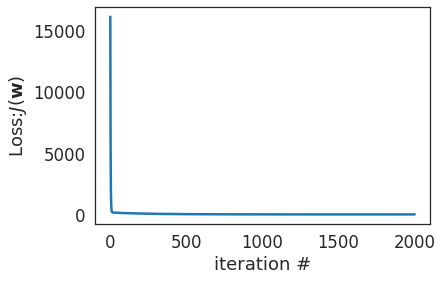

In [ ]:
w,err_all,w_all=gradient_descent(X_train,y_train,lr=0.0001,num_epochs=2000)
plot_learning_curves(err_all)

**How learning rate can change the beahaviour of loss iteration cure**


Iteration #:0,loss:16145.08
Iteration #:100,loss:10136.73
Iteration #:200,loss:6386.70
Iteration #:300,loss:4046.08
Iteration #:400,loss:2585.06
Iteration #:500,loss:1673.02
Iteration #:600,loss:1103.57
Iteration #:700,loss:747.95
Iteration #:800,loss:525.78
Iteration #:900,loss:386.88
Iteration #:1000,loss:299.97
Iteration #:1100,loss:245.49
Iteration #:1200,loss:211.27
Iteration #:1300,loss:189.68
Iteration #:1400,loss:175.97
Iteration #:1500,loss:167.19
Iteration #:1600,loss:161.49
Iteration #:1700,loss:157.70
Iteration #:1800,loss:155.11
Iteration #:1900,loss:153.27


Text(0.5, 1.0, 'lr=1e-6')

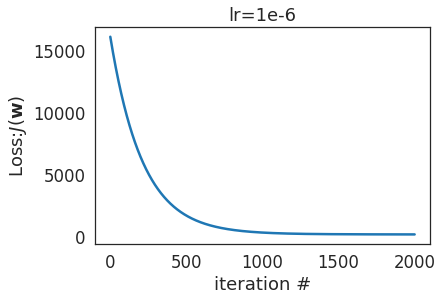

In [ ]:
w,err_all,w_all=gradient_descent(X_train,y_train,lr=1e-6,num_epochs=2000)
plot_learning_curves(err_all)
plt.title('lr=1e-6')

**At learning rate 0.1 the model is not making progres**


Iteration #:0,loss:16145.08
Iteration #:100,loss: inf
Iteration #:200,loss: nan
Iteration #:300,loss: nan
Iteration #:400,loss: nan
Iteration #:500,loss: nan
Iteration #:600,loss: nan
Iteration #:700,loss: nan
Iteration #:800,loss: nan
Iteration #:900,loss: nan
Iteration #:1000,loss: nan
Iteration #:1100,loss: nan
Iteration #:1200,loss: nan
Iteration #:1300,loss: nan
Iteration #:1400,loss: nan
Iteration #:1500,loss: nan
Iteration #:1600,loss: nan
Iteration #:1700,loss: nan
Iteration #:1800,loss: nan
Iteration #:1900,loss: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in matmul
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in subtract
  if sys.path[0] == '':


Text(0.5, 1.0, 'lr=0.1')

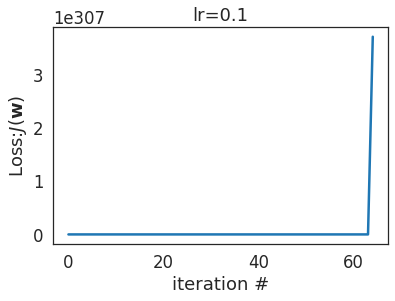

In [ ]:
w,err_all,w_all=gradient_descent(X_train,y_train,lr=0.1,num_epochs=2000)
plot_learning_curves(err_all)
plt.title('lr=0.1')

**How no of iteration or epochs can change the beahaviour of loss iteration cure**


Iteration #:0,loss:16145.08
Iteration #:100,loss:10136.73
Iteration #:200,loss:6386.70
Iteration #:300,loss:4046.08
Iteration #:400,loss:2585.06
Iteration #:500,loss:1673.02
Iteration #:600,loss:1103.57
Iteration #:700,loss:747.95
Iteration #:800,loss:525.78
Iteration #:900,loss:386.88
Iteration #:1000,loss:299.97
Iteration #:1100,loss:245.49
Iteration #:1200,loss:211.27
Iteration #:1300,loss:189.68
Iteration #:1400,loss:175.97
Iteration #:1500,loss:167.19
Iteration #:1600,loss:161.49
Iteration #:1700,loss:157.70
Iteration #:1800,loss:155.11
Iteration #:1900,loss:153.27
Iteration #:2000,loss:151.90
Iteration #:2100,loss:150.82
Iteration #:2200,loss:149.93
Iteration #:2300,loss:149.15
Iteration #:2400,loss:148.45
Iteration #:2500,loss:147.79
Iteration #:2600,loss:147.16
Iteration #:2700,loss:146.55
Iteration #:2800,loss:145.96
Iteration #:2900,loss:145.37


Text(0.5, 1.0, 'lr=1e-6')

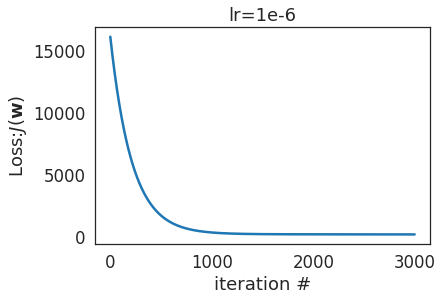

In [ ]:
w,err_all,w_all=gradient_descent(X_train,y_train,lr=1e-6,num_epochs=3000)
plot_learning_curves(err_all)
plt.title('lr=1e-6')


Iteration #:0,loss:16145.08
Iteration #:100,loss:10136.73
Iteration #:200,loss:6386.70
Iteration #:300,loss:4046.08
Iteration #:400,loss:2585.06
Iteration #:500,loss:1673.02
Iteration #:600,loss:1103.57
Iteration #:700,loss:747.95
Iteration #:800,loss:525.78
Iteration #:900,loss:386.88
Iteration #:1000,loss:299.97
Iteration #:1100,loss:245.49
Iteration #:1200,loss:211.27
Iteration #:1300,loss:189.68
Iteration #:1400,loss:175.97


Text(0.5, 1.0, 'lr=1e-6')

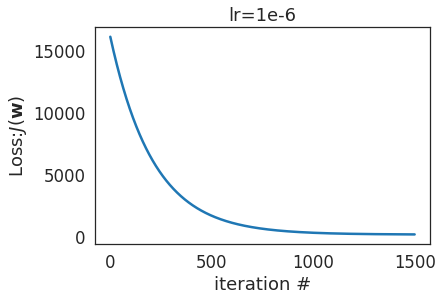

In [ ]:
w,err_all,w_all=gradient_descent(X_train,y_train,lr=1e-6,num_epochs=1500)
plot_learning_curves(err_all)
plt.title('lr=1e-6')

<h2>Optimization and Evaluation</h2>

In [ ]:
X,y=generate(100)
X_train,X_test,y_train,y_test=preprocess(X,y)

**<h2>MiniBatch Gradient Descent  (MBGD)</h2>**

The key idea here is to perform weight updates by computing gradient on batches of small number of examples.

In [ ]:
t0,t1=200,100000
'''Learning schedule is to decrease the learning rate accordingly'''
def learning_schedule(t):
  return t0/(t+t1)

In [ ]:
def mini_batch_gd(X:np.ndarray,y:np.ndarray,num_iters:int,minibatch_size:int):
  '''
    Estimates parameters of linear regression model through gradient descent

    Args:
      X:Feature matrix for training rate
      y:Label vector for training rate
      num_iters:Number of iterations

    Returns:
        Weight vector:Final weight vector
        Error vector across different iterations
        weight vectors across different iterations   
  '''
  w_all=[]
  err_all=[]

  w=np.zeros((X.shape[1]))
  t=0
  
  for epoch in range(num_iters):
    shuffled_indices=np.random.permutation(X.shape[0])
    X_shuffled=X[shuffled_indices]
    y_shuffled=y[shuffled_indices]

    for i in range(0,X.shape[0],minibatch_size):
        t+=1
        xi=X_shuffled[i:i+minibatch_size]
        yi=y_shuffled[i:i+minibatch_size]
        err_all.append(loss(xi,yi,w))

        gradient=2/minibatch_size*calculate_gradient(xi,yi,w)
        lr=learning_schedule(t)


        w=update_weights(w,gradient,lr)
        w_all.append(w)

  return w,err_all,w_all       

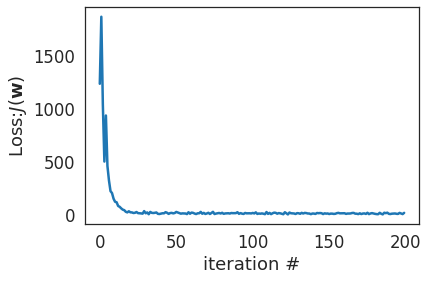

In [ ]:
w,err_all,w_all=mini_batch_gd(X_train,y_train,20,8)
plot_learning_curves(err_all)

**<h2>Stochastic Gradient Descent  (SGD)</h2>**

The key idea here is to perform weight updates by computing gradient on one example at a time.
It is basically MBGD with number of example per batch=1

In [ ]:
def sgd(X:np.ndarray,y:np.ndarray,num_epochs:int):
  '''
    Estimates parameters of linear regression model through gradient descent

    Args:
      X:Feature matrix for training rate
      y:Label vector for training rate
      num_epochs:Number of iterations

    Returns:
        Weight vector:Final weight vector
        Error vector across different iterations
        weight vectors across different iterations   
  '''
  w_all=[]
  err_all=[]

  w=np.zeros((X.shape[1]))

  for epoch in range(num_epochs):
    for i in range(X.shape[0]):
        random_index=np.random.randint(X.shape[0])
        xi=X[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        err_all.append(loss(xi,yi,w))

        gradient=2*calculate_gradient(xi,yi,w)
        lr=learning_schedule(epoch*X.shape[0]+i)


        w=update_weights(w,gradient,lr)
        w_all.append(w)

  return w,err_all,w_all       

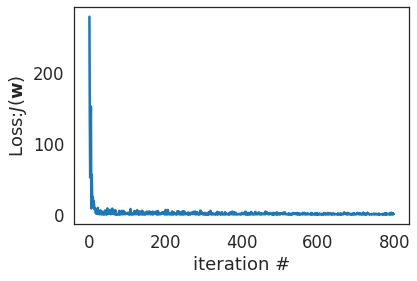

In [ ]:
w,err_all,w_all=sgd(X_train,y_train,10)
plot_learning_curves(err_all)

<h2>Combining whole collab for linear regression model</h2>

In [ ]:
class LinReg(object):
    '''            I
        Linear regression model
        y=xew
        X:Afeature matrix
        w:weight vector
        y:label vector
    '''
    def __init__(self):
      self.t0=200
      self.t1=100000
    def predict(self,X:np.ndarray)->np.ndarray:
      '''Prediction of output label foragiven input.
      Args:
        X:Feature matrix for given inputs.
      Returns:
        y:Output label vector as predicted by the given model.
      '''  
      y=X@self.w
      return y
    def loss(self,X:np.ndarray,y:np.ndarray)->float:
      ''' Calculates loss foramodel based on known labels.
          Args:
            X:Feature matrix for given inputs.
            y:Output label vector as predicted by the given model.
          Returns:
            Loss
      '''
      e=y-self.predict(X)
      return (1/2)*(np.transpose(e)@e)
    def rmse(self,X:np.ndarray,y:np.ndarray)->float:
      ''' Calculates root mean squared error of prediction w.r.t. actual label.
          Args:
          X:Feature matrix for given inputs.
          y:Output label vector as predicted by the given model.
          Returns:
          Loss
      ''' 
      return np.sqrt((2/X.shape[0])*self.loss(X,y))
    def fit(self,X:np.ndarray,y:np.ndarray)->np.ndarray:
      ''' Estimates parameters of the linear regression model with normal equation.
            Args:
            X:Feature matrix for given inputs.
            y:Output label vector as predicted by the given model.
                  I
            Returns:
            Weight vector
      '''
      self.w=np.linalg.pinv(X)@y
      return self.w
    def calculate_gradient(self,X:np.ndarray,y:np.ndarray)->np.ndarray:
      '''Calculates gradients of loss function w.r.t weight vector on training set.
          Arguments:
              X:Feature matrix for training data.
              y:Label vector for training data.
          Returns:
              A vector of gradients.
      '''
      return np.transpose(X)@(self.predict(X)-y)
    def update_weights(self,grad:np.ndarray,lr:float)->np.ndarray:
      '''Updates the weights based on the gradient of loss function.
        Weight updates are carried out with the following formula:
            w_new:=w_old-ir*grad
        Args:
          2. grad:gradient of loss w.r.t.w
          3. lr:learning rate
        Returns:
          Updated weight vector
      '''
      return(self.w-lr*grad)

    def learning_schedule(self,t):
      return self.t0/(t+self.tl)
    def gd(self,X:np.ndarray,y:np.ndarray,num_epochs:int,lr:float)->np.ndarray:
      '''Estimates parameters of linear regression model through gradient descent.
          Args:
                X:Feature matrix for training data.
                y:Label vector for training data.
                num_epochs:Number of training steps
                1r:Learning rate
          Returns:
              Weight vector:Final weight vector
      '''
      self.w=np.zeros((X.shape[1]))
      self.w_all=[]
      self.err_all=[]
      for i in np.arange(0,num_epochs):
        dJdw=self.calculate_gradient(X,y)
        self.w_all.append(self.w)
        self.err_all.append(self.loss(X,y))
        self.w=self.update_weights(dJdw,lr)
      return self.w


    def mbgd(self,X:np.ndarray,y:np.ndarray,num_epochs:int,batch_size:int)->np.ndarray:
      ''' Estimates parameters of linear regression model through gradient descent.
          Args:
            X:Feature matrix for training data.
              y:Label vector for training data.
              num_epochs:Number of training steps
              batch_size:Number of examples inabatch
          Returns:
            Weight vector:Final weight vector
      '''
      self.w=np.zeros((X.shape[1]))
      self.w_all=[]
      self.err_all=[]
      mini_batch_id=0

      for epoch in range(num_epochs):
        shuffled_indices=np.random.permutation(X.shape[0])
        X_shuffled=X[shuffled_indices]
        y_shuffled=y[shuffled_indices]
        for i in range(0,X.shape[0],batch_size):
          mini_batch_id+=1
          xi=X_shuffled[i:i+batch_size]
          yi=y_shuffled[i:i+batch_size]

          self.w_all.append(self.w)
          self.err_all.append(self.loss(xi,yi))

          dJdw=2/batch_size*self.calculate_gradient(xi,yi)
          self.w=self.update_weights(dJdw,self.learning_schedule(mini_batch_id))
      return self.w

    def sgd(self,X:np.ndarray,y:np.ndarray,num_epochs:int)->np.ndarray:
      '''Estimates parameters of linear regression model through gradient descent.
          Args:
            X:Feature matrix for training data.
            y:Label vector for training data.
              num_epochs:Number of training steps
            batch_size:Number of examples inabatch
          Returns:
            Weight vector:Final weight vector
      '''
      #Parameter vector initialized to[0,0]
      self.w=np.zeros((X.shape[1]))
      self.w_all=[]
      self.err_all=[]
      for epoch in range(num_epochs):
        for i in range(X.shape[0]):
          random_index=np.random.randint(X.shape[0])
          xi=X[random_index:random_index+1]
          yi=y[random_index:random_index+1]
          
          self.w_all.append(self.w)
          self.err_all.append(self.loss(xi,yi))
        
          gradients=2*self.calculate_gradient(xi,yi)
          lr=self.learning_schedule(epoch*X.shape[0]+i)
          
          self.w=self.update_weights(gradients,lr)
      return self.w   

In [ ]:
#@title Default title text
class LinReg(object):

  '''

  Linear regression model
  ----------------------
  y=X@w
  X:A feature matrix
  w:weight vector
  y:label vector
  '''

  def __init__(self):
    self.t0=200
    self.t1=1e5

  def predict(self,X:np.ndarray)->np.ndarray:
    '''
        Prediction of output for a given input

        Args:
          X:feature matrix for given inputs
        Returns:
          y:output label vector as predicted by given model  
    '''
    y=X@self.w
    return y


  def loss(self,X:np.ndarray,y:np.ndarray)->float:

    '''
        Args:
          x:Feature matrix for given inputs
          y:Outputs label vector as predicted by the given model
    '''
    e=y-self.predict(X)
    return  (1/2)*(e.T@e)

  def rmse (self,X:np.ndarray,y:np.ndarray)->float:
    '''
      Calculates root mean squared error

      returns loss
    '''
    return np.sqrt((2/X.shape[0])*self.loss(X,y))


  def fit(self,X:np.ndarray,y:np.ndarray)->np.ndarray:

    '''
    Estimates parameters of the linear regression model with normal equation.
    returns weight vector
    '''
    self.w=np.linalg.pinv(X)@y_train
    return self.w

  def calculate_gradient(self,X:np.ndarray,y:np.ndarray)->np.ndarray:
     return X.T@(self.predict(X)-y)

  # def update_weights(self,grad:np.ndarray)    

In [ ]:
lin_reg=LinReg()

<h2>Linear regression on multiple features and single label

In [ ]:
from sklearn.datasets import make_regression

X,y,coef=make_regression(n_samples=100,n_features=10,n_informative=10,n_targets=1,coef=True,shuffle=True,noise=0.5,random_state=0)

In [ ]:
print("Shape of feature matrix: ",X.shape)
print("Shape of label vector: ",y.shape)
print("Shape of coef vector",coef)

Shape of feature matrix:  (100, 10)
Shape of label vector:  (100,)
Shape of coef vector [77.47476142 34.21038752 70.05286228  1.42515152 82.19039084 96.65751069
 88.30775973 61.47698861 99.42330832  3.71296039]


In [ ]:
X_train,X_test,y_train,y_test=preprocess(X,y)

In [ ]:
lin_reg.fit(X_train,y_train)
print("Weight vector (normal equation)",w)

Weight vector (normal equation) [-1.57412102e-02  7.74718967e+01  3.42054594e+01  7.01565870e+01
  1.41977159e+00  8.21863776e+01  9.67286684e+01  8.84628292e+01
  6.13325399e+01  9.93672696e+01  3.64670572e+00]


In [ ]:
np.testing.assert_almost_equal(coef,lin_reg.w[1:],decimal=0)